# Import Data and Defining Function

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [366]:
dfRaw = pd.read_csv('data_saudi_used_cars.csv')
dfRaw.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [367]:
#Defining Function

def dataDescription(df):
    tempList = []
    for col in df.columns:
        tempList.append(
            [col,
            df[col].dtype,
            df[col].isna().sum(),
            round(df[col].isna().sum()/len(df)*100,2),
            df[col].nunique(),
            #list(df[col].drop_duplicates().sample(5,replace=True).values)
            list(df[col].drop_duplicates().sort_values().values)
            ]
        )

    descData = pd.DataFrame(data = tempList,
                            columns = ['Col','Data Type','Missing Value', 'Pct Missing Value','Num Unique','Unique Sample']
                            )
    display(descData)

def normalCheckShapiro(data):

    _, p_value = stats.shapiro(data)

    alpha = 0.05
    if p_value > alpha:
        print("The data is normally distributed.")
    else:
        print("The data is not normally distributed.")

def outliersDetail(dataframe,field,detail=''):
    q1 = dataframe[field].describe()['25%']
    q3 = dataframe[field].describe()['75%']
    IQR = q3 - q1
    lowerBound = q1 - (3*IQR)
    upperBound = q3 + (3*IQR)

    print(f'Jumlah data\t= {len(dataframe)}')
    print(f'lower extreme bound\t= {lowerBound}\nupper extreme bound\t= {upperBound}')
    print(f'Jumlah data outliers\t= {len(dataframe[dataframe[field]<lowerBound]) + len(dataframe[dataframe[field]>upperBound])}')

    dfExcludeOutliers = dataframe[dataframe[field].between(lowerBound,upperBound)]
    print(f'Jumlah data (exclude outliers)\t= {len(dfExcludeOutliers)}')

    plt.figure()
    sns.boxplot(dataframe[field].reset_index(drop=True), orient='h')
    plt.title(f'Pesebaran Data {field} {detail}')
    plt.show()

    plt.figure()
    sns.boxplot(dfExcludeOutliers[field].reset_index(drop=True), orient='h')
    plt.title(f'Pesebaran Data {field} {detail} (Extreme Outliers excluded)')
    plt.show()

    display(dataframe[(dataframe[field]<lowerBound)|(dataframe[field]>upperBound)].sort_values(field,ascending=True))


# Data Understanding and Pre-Processing

## Data Understanding

**Saudi Arabia Used Cars**

**Context**


The dataset contains 5624 records of used cars collected from syarah.com. Each row represents a used car. Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiable.


**Features**
- Type: Type of used car.
- Region: The region in which the used car was offered for sale.
- Make: The company name.
- Gear_Type: Gear type size of used car.
- Origin: Origin of used car.
- Options: Options of used car.
- Year: Manufacturing year.
- Engine_Size: The engine size of used car.
- Mileage: Mileage of used car	
- Negotiable: True if the price is 0, that means it is negotiable.
- Price: Used car price.

In [368]:
display(f'total rows: {len(dfRaw)}',dfRaw.describe(), dfRaw.describe(exclude='number'), dataDescription(dfRaw))

,Col,Data Type,Missing Value,Pct Missing Value,Num Unique,Unique Sample
0,Type,object,0,0.0,347,"[2, 3, 300, 3008, 301, 360, 4Runner, 5, 500, 5..."
1,Region,object,0,0.0,27,"[Abha, Al-Ahsa, Al-Baha, Al-Jouf, Al-Medina, A..."
2,Make,object,0,0.0,58,"[Aston Martin, Audi, BMW, BYD, Bentley, Cadill..."
3,Gear_Type,object,0,0.0,2,"[Automatic, Manual]"
4,Origin,object,0,0.0,4,"[Gulf Arabic, Other, Saudi, Unknown]"
5,Options,object,0,0.0,3,"[Full, Semi Full, Standard]"
6,Year,int64,0,0.0,50,"[1963, 1964, 1965, 1975, 1977, 1978, 1979, 198..."
7,Engine_Size,float64,0,0.0,71,"[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, ..."
8,Mileage,int64,0,0.0,1716,"[100, 104, 105, 106, 107, 108, 109, 110, 111, ..."
9,Negotiable,bool,0,0.0,2,"[False, True]"


'total rows: 5624'

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


,Type,Region,Make,Gear_Type,Origin,Options,Negotiable
count,5624,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3,2
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,False
freq,269,2272,1431,4875,4188,2233,3828


None

In [369]:
df = dfRaw.copy()

## Pre-Processing

Pada tahap ini data akan dibersihkan dan/atau direview dengan tahapan berikut:

1. Unnecessary Field Handling
2. Data-Type Handling
3. N/A (Null) Handling
4. Standardize Handling
5. Anomali Handling
6. Duplicate Handling

### 1. Unnecessary Field Handling

In [370]:
tempList = []
for col in df.columns:
    tempList.append(
        [col,
        df[col].dtype,
        df[col].nunique(),
        list(df[col].drop_duplicates().sort_values().values)
        ]
    )

descData = pd.DataFrame(data = tempList,
                        columns = ['Col','Data-Type','Num Unique','Unique Sample']
                        )
display(descData)

,Col,Data-Type,Num Unique,Unique Sample
0,Type,object,347,"[2, 3, 300, 3008, 301, 360, 4Runner, 5, 500, 5..."
1,Region,object,27,"[Abha, Al-Ahsa, Al-Baha, Al-Jouf, Al-Medina, A..."
2,Make,object,58,"[Aston Martin, Audi, BMW, BYD, Bentley, Cadill..."
3,Gear_Type,object,2,"[Automatic, Manual]"
4,Origin,object,4,"[Gulf Arabic, Other, Saudi, Unknown]"
5,Options,object,3,"[Full, Semi Full, Standard]"
6,Year,int64,50,"[1963, 1964, 1965, 1975, 1977, 1978, 1979, 198..."
7,Engine_Size,float64,71,"[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, ..."
8,Mileage,int64,1716,"[100, 104, 105, 106, 107, 108, 109, 110, 111, ..."
9,Negotiable,bool,2,"[False, True]"


Pada tahap ini setiap field (column) telah berhasil merepresentasikan sebuah informasi. Sehingga, tidak diberlakukan proses drop pada field yang tersedia.

### 2. Data-Type Handling

In [371]:
tempList = []
for col in df.columns:
    tempList.append(
        [col,
        df[col].dtype,
        list(df[col].drop_duplicates().sort_values().values)
        ]
    )

descData = pd.DataFrame(data = tempList,
                        columns = ['Col','Data-Type','Unique Sample']
                        )
display(descData)

,Col,Data-Type,Unique Sample
0,Type,object,"[2, 3, 300, 3008, 301, 360, 4Runner, 5, 500, 5..."
1,Region,object,"[Abha, Al-Ahsa, Al-Baha, Al-Jouf, Al-Medina, A..."
2,Make,object,"[Aston Martin, Audi, BMW, BYD, Bentley, Cadill..."
3,Gear_Type,object,"[Automatic, Manual]"
4,Origin,object,"[Gulf Arabic, Other, Saudi, Unknown]"
5,Options,object,"[Full, Semi Full, Standard]"
6,Year,int64,"[1963, 1964, 1965, 1975, 1977, 1978, 1979, 198..."
7,Engine_Size,float64,"[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, ..."
8,Mileage,int64,"[100, 104, 105, 106, 107, 108, 109, 110, 111, ..."
9,Negotiable,bool,"[False, True]"


Pada tahap ini seluruh tipe data untuk setiap field (column) sudah sesuai. Sehingga, tidak diperlukan untuk dilakukan penyesuaian lebih lanjut.

### 3. N/A (Null Handling)

In [372]:
tempList = []
for col in df.columns:
    tempList.append(
        [col,
        df[col].isna().sum(),
        round(df[col].isna().sum()/len(df)*100,2),
        ]
    )

descData = pd.DataFrame(data = tempList,
                        columns = ['Col','Missing Value', 'Pct Missing Value']
                        )
display(descData)

,Col,Missing Value,Pct Missing Value
0,Type,0,0.0
1,Region,0,0.0
2,Make,0,0.0
3,Gear_Type,0,0.0
4,Origin,0,0.0
5,Options,0,0.0
6,Year,0,0.0
7,Engine_Size,0,0.0
8,Mileage,0,0.0
9,Negotiable,0,0.0


Pada tahap ini tidak ditemukan lagi missing value (n/a) pada setiap field yang ada. Sehingga, tidak diperlukan lagi penysuaian lebih lanjut.

### 4. Standardize Handling

#### Field : Type

In [373]:
df['Type'].unique()

array(['Corolla', 'Yukon', 'Range Rover', 'Optima', 'FJ', 'CX3',
       'Cayenne S', 'Sonata', 'Avalon', 'LS', 'C300', 'Land Cruiser',
       'Hilux', 'Tucson', 'Caprice', 'Sunny', 'Pajero', 'Azera', 'Focus',
       '5', 'Spark', 'Camry', 'Pathfinder', 'Accent', 'ML', 'Tahoe',
       'Yaris', 'Suburban', 'A', 'Altima', 'Traverse', 'Expedition',
       'Senta fe', 'Liberty', '3', 'X', 'Elantra', 'Land Cruiser Pickup',
       'VTC', 'Malibu', 'The 5', 'A8', 'Patrol', 'Grand Cherokee', 'SL',
       'Previa', 'SEL', 'Aveo', 'MKZ', 'Victoria', 'Datsun', 'Flex',
       'GLC', 'ES', 'Edge', '6', 'Escalade', 'Innova', 'Navara', 'H1',
       'G80', 'Carnival', 'Symbol', 'Camaro', 'Accord', 'Avanza',
       'Land Cruiser 70', 'Taurus', 'C5700', 'Impala', 'Optra', 'S',
       'Other', 'Cerato', 'Furniture', 'Murano', 'Explorer', 'LX',
       'Pick up', 'Charger', 'H6', 'BT-50', 'Hiace', 'Ranger', 'Fusion',
       'Rav4', 'Ciocca', 'CX9', 'Kona', 'Sentra', 'Sierra', 'Durango',
       'CT-S', 'Sylv

Field Type tidak diperlukan sebuah standarisasi value dikarenakan penulisan value yang ada sangat beragam.

#### Field : Region

In [374]:
df['Region'].unique()

array(['Abha', 'Riyadh', 'Hafar Al-Batin', 'Aseer', 'Makkah', 'Dammam',
       'Yanbu', 'Al-Baha', 'Jeddah', 'Hail', 'Khobar', 'Al-Ahsa', 'Jazan',
       'Al-Medina', 'Al-Namas', 'Tabouk', 'Taef', 'Qassim', 'Arar',
       'Jubail', 'Sabya', 'Al-Jouf', 'Najran', 'Wadi Dawasir', 'Qurayyat',
       'Sakaka', 'Besha'], dtype=object)

Field Region tidak diperlukan sebuah standarisasi value dikarenakan penulisan value yang ada sudah menggunakan standar Capitalization untuk penamaan daerah.

#### Field : Make

In [375]:
df['Make'].unique()

array(['Toyota', 'GMC', 'Land Rover', 'Kia', 'Mazda', 'Porsche',
       'Hyundai', 'Lexus', 'Chrysler', 'Chevrolet', 'Nissan',
       'Mitsubishi', 'Ford', 'MG', 'Mercedes', 'Jeep', 'BMW', 'Audi',
       'Lincoln', 'Cadillac', 'Genesis', 'Renault', 'Honda', 'Suzuki',
       'Zhengzhou', 'Dodge', 'HAVAL', 'INFINITI', 'Isuzu', 'Changan',
       'Aston Martin', 'Mercury', 'Great Wall', 'Other', 'Rolls-Royce',
       'MINI', 'Volkswagen', 'BYD', 'Geely', 'Victory Auto', 'Classic',
       'Jaguar', 'Daihatsu', 'Maserati', 'Hummer', 'GAC', 'Lifan',
       'Bentley', 'Chery', 'Peugeot', 'Foton', 'Škoda', 'Fiat', 'Iveco',
       'SsangYong', 'FAW', 'Tata', 'Ferrari'], dtype=object)

Field Make tidak diperlukan sebuah standarisasi value dikarenakan value yang beragam sesuai dengan perusahaan masing-masing.

#### Field : Gear_Type

In [376]:
df['Gear_Type'].unique()

array(['Manual', 'Automatic'], dtype=object)

Field Gear_Type tidak diperlukan lagi standarisasi karena tidak ditemukan kejanggalan penulisan

#### Field : Origin

In [377]:
df['Origin'].unique()

array(['Saudi', 'Gulf Arabic', 'Other', 'Unknown'], dtype=object)

Field Origin tidak diperlukan lagi standarisasi karena tidak ditemukan kejanggalan penulisan

#### Field : Options

In [378]:
df['Options'].unique()

array(['Standard', 'Full', 'Semi Full'], dtype=object)

Field Options tidak diperlukan lagi standarisasi karena tidak ditemukan kejanggalan penulisan

#### Year, Engine_Size, Mileage, Negotiable, and Price
Field Year, Engine_Size, Mileage, dan Price sudah diperlukan standarisasi character karena tipe data sudah numerikal dan sudah sesuai dengan peruntukannya. Sedangkan untuk Negotiable tipe data berupa boolean.

In [379]:
df.columns

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year',
       'Engine_Size', 'Mileage', 'Negotiable', 'Price'],
      dtype='object')

### 5. Anomali Handling

#### Boxplot Visualization

Year
The data is not normally distributed.
Jumlah data	= 5624
lower extreme bound	= 1994.0
upper extreme bound	= 2036.0
Jumlah data outliers	= 71
Jumlah data (exclude outliers)	= 5553


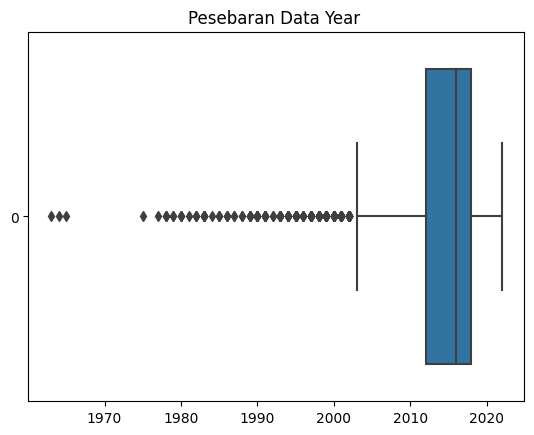

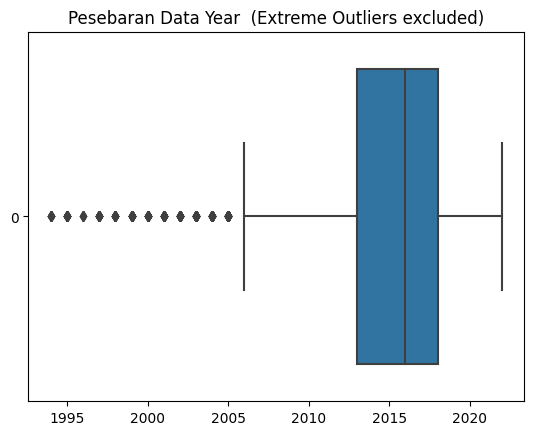

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
5012,Other,Riyadh,Ford,Manual,Saudi,Standard,1963,1.0,300,False,22000
2262,Impala,Al-Ahsa,Chevrolet,Automatic,Other,Full,1964,1.2,100000,False,75000
617,Thunderbird,Riyadh,Ford,Automatic,Other,Full,1965,8.0,25000,True,0
1871,POS24,Al-Medina,Mercedes,Manual,Saudi,Full,1975,8.0,22552,True,0
104,C5700,Hafar Al-Batin,GMC,Manual,Saudi,Standard,1977,1.5,4358765,True,0
...,...,...,...,...,...,...,...,...,...,...,...
4230,Cressida,Jeddah,Toyota,Manual,Gulf Arabic,Standard,1993,1.2,25000,False,15000
5460,E,Jeddah,Mercedes,Automatic,Gulf Arabic,Full,1993,3.2,217396,False,35000
3480,Cressida,Aseer,Toyota,Manual,Other,Standard,1993,2.2,49500,False,9500
3286,Land Cruiser,Al-Medina,Toyota,Manual,Other,Semi Full,1993,4.6,196671,False,30000


Engine_Size
The data is not normally distributed.
Jumlah data	= 5624
lower extreme bound	= -5.5
upper extreme bound	= 12.0
Jumlah data outliers	= 0
Jumlah data (exclude outliers)	= 5624


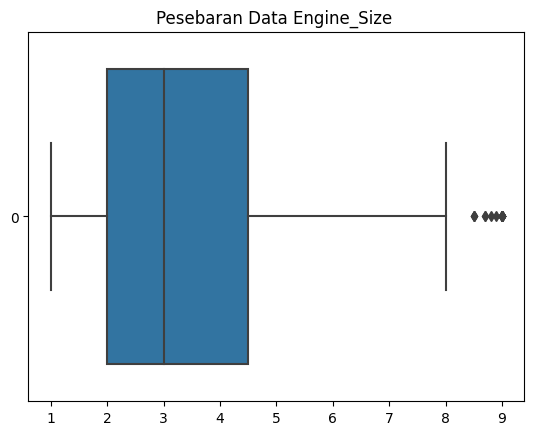

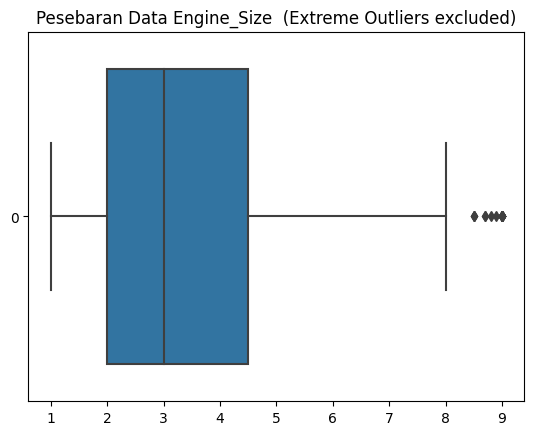

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


Mileage
The data is not normally distributed.
Jumlah data	= 5624
lower extreme bound	= -436000.0
upper extreme bound	= 670000.0
Jumlah data outliers	= 45
Jumlah data (exclude outliers)	= 5579


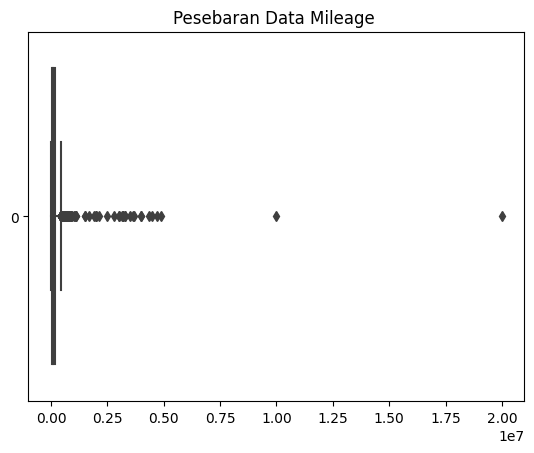

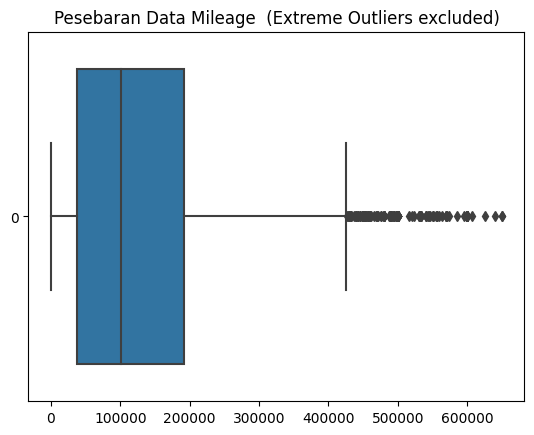

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
5151,Sierra,Riyadh,GMC,Automatic,Saudi,Full,2010,8.0,700000,True,0
2291,Camry,Makkah,Toyota,Manual,Saudi,Standard,2001,1.1,700000,True,0
4603,Land Cruiser,Tabouk,Toyota,Manual,Saudi,Full,1997,4.5,708000,False,25000
3792,Suburban,Taef,GMC,Automatic,Saudi,Standard,2001,1.5,718314,True,0
2493,Innova,Riyadh,Toyota,Automatic,Gulf Arabic,Standard,2015,2.7,749000,False,46000
2052,Elantra,Riyadh,Hyundai,Automatic,Saudi,Full,2021,2.0,750000,True,0
3282,Hilux,Taef,Toyota,Manual,Saudi,Semi Full,2012,2.4,800000,True,0
1850,Camry,Al-Medina,Toyota,Manual,Other,Semi Full,2000,1.8,800000,True,0
2427,Corolla,Riyadh,Toyota,Manual,Saudi,Standard,2005,1.3,801500,False,14000
4606,Maxima,Riyadh,Nissan,Automatic,Saudi,Full,2017,1.0,860000,False,77000


Price
The data is not normally distributed.
Jumlah data	= 5624
lower extreme bound	= -218797.5
upper extreme bound	= 291730.0
Jumlah data outliers	= 80
Jumlah data (exclude outliers)	= 5544


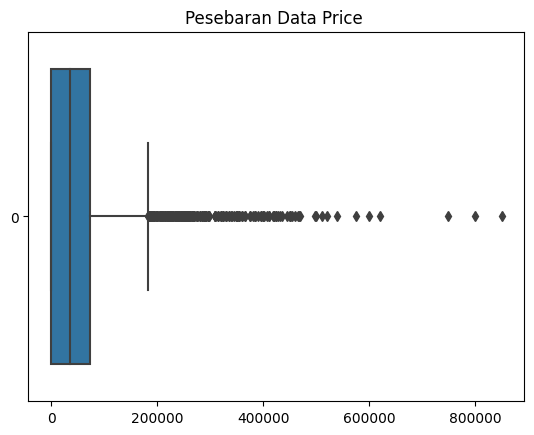

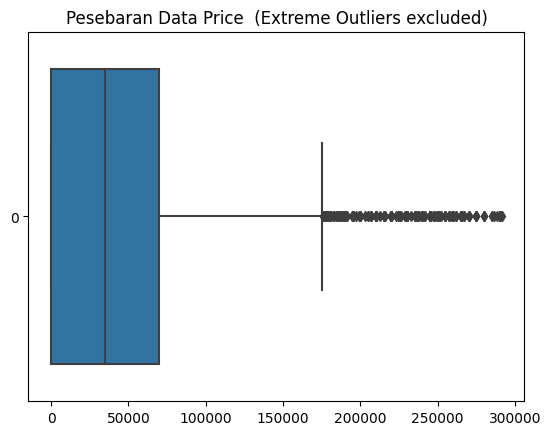

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
2416,Range Rover,Al-Medina,Land Rover,Automatic,Saudi,Full,2017,3.0,72500,False,295000
2927,Land Cruiser,Dammam,Toyota,Automatic,Saudi,Full,2021,4.6,8000,False,295000
3516,Land Cruiser,Dammam,Toyota,Automatic,Saudi,Full,2021,4.6,20000,False,296000
893,Land Cruiser,Dammam,Toyota,Automatic,Saudi,Full,2019,5.7,6000,False,298000
4170,LS,Dammam,Lexus,Automatic,Gulf Arabic,Full,2018,3.5,55000,False,298000
...,...,...,...,...,...,...,...,...,...,...,...
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,False,599000
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,False,620000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,False,748000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,False,800000


In [380]:
listTemp = ['Year','Engine_Size', 'Mileage', 'Price']

for i in listTemp:
    print(i)
    normalCheckShapiro(df[i])
    #dfTemp = df[df['jenis']==i]
    outliersDetail(df,i)
    

#### Drop Anomaly Data

- Year -> Setelah dilakukan pengecekan data year terendah ada pada tahun 1963 yang dibuat oleh Ford. Setelah dilakukan pencarian organik pada internet didapatkan data mobil ford yang dibuat pada tahun 1963. Sehingga, tidak ada row yang didrop untuk field Year.
- Engine_Size -> Setelah dilakukan pengecekan menggunakan boxplot, tidak ada extreme outliers yang ditemukan. Sehingga, tidak ada row yang didrop untuk field Engine_Size.
- **Mileage -> Terdapat data extreme yang diperlukan pengecekan lebih lanjut.**
- **Price -> Terdapat data extreme yang diperlukan pengecekan lebih lanjut.**

##### Mileage

In [381]:
print('Findings:')
dfTemp = df[df['Mileage']>7500000]
display(dfTemp)
for i in dfTemp.iloc[:,0]:
    display(i)
    display(df[(df['Type']==i)].sort_values('Mileage'))

Findings:


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1224,POS24,Aseer,Mercedes,Manual,Other,Full,1983,8.0,9999999,True,0
3403,Optra,Riyadh,Chevrolet,Manual,Other,Semi Full,2009,1.6,20000000,False,9000


'POS24'

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
4486,POS24,Taef,Mercedes,Manual,Other,Standard,1982,8.0,1000,True,0
1871,POS24,Al-Medina,Mercedes,Manual,Saudi,Full,1975,8.0,22552,True,0
5222,POS24,Riyadh,Mercedes,Manual,Other,Standard,1982,2.4,100000,True,0
1224,POS24,Aseer,Mercedes,Manual,Other,Full,1983,8.0,9999999,True,0


'Optra'

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1988,Optra,Jeddah,Chevrolet,Automatic,Saudi,Semi Full,2008,1.3,155,True,0
464,Optra,Hafar Al-Batin,Chevrolet,Manual,Other,Semi Full,2005,1.6,300,True,0
3796,Optra,Jeddah,Chevrolet,Automatic,Gulf Arabic,Full,2010,1.6,206000,False,8000
2356,Optra,Riyadh,Chevrolet,Automatic,Saudi,Standard,2011,1.6,216000,False,9000
3623,Optra,Makkah,Chevrolet,Automatic,Saudi,Semi Full,2008,1.6,250000,True,0
1169,Optra,Jeddah,Chevrolet,Automatic,Other,Semi Full,2008,1.6,253250,False,9000
4918,Optra,Dammam,Chevrolet,Manual,Saudi,Semi Full,2009,2.0,290000,False,7500
110,Optra,Riyadh,Chevrolet,Automatic,Saudi,Standard,2007,1.6,2000000,False,5000
3403,Optra,Riyadh,Chevrolet,Manual,Other,Semi Full,2009,1.6,20000000,False,9000


Pada field ini ditemukan data dengan mileage 9,999,999 dan 20,000,000. Kedua Data tesebut dilakukan drop dikarenakan adanya asumsi dalam kesalahan proses input data. Kesalahan proses input data tersebut dapat diasumsikan dengan melihat jarak data dengan pusat data yang relatif jauh.

In [382]:
df.drop(dfTemp.index,inplace=True)
dfTemp = df[df['Mileage']>7500000]
print("Findings after anomaly's drop:")
display(dfTemp)

Findings after anomaly's drop:


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


##### Price

In [383]:
print('Findings:')
dfTemp = df[df['Price']>700000]
display(dfTemp)
for i in dfTemp.iloc[:,0]:
    display(i)
    display(df[df['Type']==i].sort_values(['Year','Price']))

Findings:


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,False,850000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,False,748000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,False,800000


'Bentayga'

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,False,850000


'S'

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
4259,S,Riyadh,Mercedes,Automatic,Other,Standard,1980,3.0,160000,False,40000
290,S,Al-Jouf,Mercedes,Automatic,Other,Full,1993,3.0,138,False,22000
644,S,Al-Namas,Mercedes,Automatic,Other,Full,1995,3.0,200000,False,15000
3855,S,Al-Ahsa,Mercedes,Automatic,Other,Semi Full,1995,3.0,115,False,21000
4542,S,Dammam,Mercedes,Automatic,Saudi,Semi Full,2000,3.0,100,False,15000
...,...,...,...,...,...,...,...,...,...,...,...
3327,S,Dammam,Mercedes,Automatic,Saudi,Semi Full,2018,3.0,590,False,390000
4996,S,Riyadh,Mercedes,Automatic,Gulf Arabic,Semi Full,2019,3.5,80000,False,355000
5139,S,Riyadh,Mercedes,Automatic,Gulf Arabic,Full,2019,3.0,6000,False,470000
2996,S,Dammam,Mercedes,Automatic,Saudi,Full,2020,3.5,19700,False,395000


'G'

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1282,G,Jeddah,INFINITI,Automatic,Gulf Arabic,Full,2007,6.0,210000,True,0
3772,G,Riyadh,INFINITI,Automatic,Saudi,Full,2007,6.0,200000,True,0
1182,G,Riyadh,Mercedes,Automatic,Saudi,Full,2014,5.5,125000,False,245000
600,G,Riyadh,Mercedes,Automatic,Saudi,Full,2015,8.8,213000,False,240000
1855,G,Dammam,Mercedes,Automatic,Saudi,Full,2015,4.0,188000,False,270000
3125,G,Qassim,Mercedes,Automatic,Saudi,Full,2016,4.0,150000,True,0
3687,G,Dammam,Mercedes,Automatic,Saudi,Full,2017,4.0,113000,False,330000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,False,800000


Pada field ini ditemukan data dengan Price dan tindaklanjut sebagai berikut:
1. Bentayga (Bentley) : 850000 -> **Tidak dilakukan drop** dikarenakan tidak ada perbandingan harga dengan tipe yang sama pada tahun yang sama.
2. S (Mercedes) : 748000 -> **Tidak dilakukan drop** dikarenakan mobil diasumsikan masih menjadi tipe terbaru yang ada di dataset (Year 2021) dan tidak ada perbandingan harga dengan tipe yang sama pada tahun yang sama. Sehingga, dapat diasumsikan harga yang tinggi disebabkan oleh tahun mobil tersebut dibuat.
3. G (Mercedes) : 800000 -> **Tidak dilakukan drop** dikarenakan mobil diasumsikan masih menjadi tipe terbaru yang ada di dataset (Year 2019) dan tidak ada perbandingan harga dengan tipe yang sama pada tahun yang sama. Sehingga, dapat diasumsikan harga yang tinggi disebabkan oleh tahun mobil tersebut dibuat.

#### More Anomaly Data

Negotiable: True if the price is 0, that means it is negotiable.

Dari pemahaman atas field Negotiable, dilakukan pengecekan lebih lanjut sebagai berikut:

In [384]:
df[df['Price']==0]['Negotiable'].value_counts()

Negotiable
True     1795
False       1
Name: count, dtype: int64

In [385]:
df[(df['Price']==0)&(df['Negotiable']==False)]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3168,Furniture,Riyadh,Toyota,Automatic,Other,Semi Full,2012,2.7,225000,False,0


In [386]:
df.loc[df['Price'] == 0, 'Negotiable'] = True
df[df['Price']==0]['Negotiable'].value_counts()

Negotiable
True    1796
Name: count, dtype: int64

Ditemukan 1 data dengan Price 0 tetapi masuk ke dalam kategori False. Sehingga, data tersebut dilakukan penyesuaian pada kolom Negotiable (False->True).

### 6. Duplicate Handling

In [387]:
df[df.duplicated()==True]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


Terdapat duplikat 4 data. Sehingga diperlukan delete row untuk data tersebut.

In [388]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df[df.duplicated()==True]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


Pada tahap ini, tidak ditemukan lagi data yang terduplikasi

# Data Preparation Review and Export Cleansed Data

In [389]:
display(f'total rows: {len(dfRaw)}',dfRaw.describe(), dfRaw.describe(exclude='number'), dataDescription(dfRaw))

,Col,Data Type,Missing Value,Pct Missing Value,Num Unique,Unique Sample
0,Type,object,0,0.0,347,"[2, 3, 300, 3008, 301, 360, 4Runner, 5, 500, 5..."
1,Region,object,0,0.0,27,"[Abha, Al-Ahsa, Al-Baha, Al-Jouf, Al-Medina, A..."
2,Make,object,0,0.0,58,"[Aston Martin, Audi, BMW, BYD, Bentley, Cadill..."
3,Gear_Type,object,0,0.0,2,"[Automatic, Manual]"
4,Origin,object,0,0.0,4,"[Gulf Arabic, Other, Saudi, Unknown]"
5,Options,object,0,0.0,3,"[Full, Semi Full, Standard]"
6,Year,int64,0,0.0,50,"[1963, 1964, 1965, 1975, 1977, 1978, 1979, 198..."
7,Engine_Size,float64,0,0.0,71,"[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, ..."
8,Mileage,int64,0,0.0,1716,"[100, 104, 105, 106, 107, 108, 109, 110, 111, ..."
9,Negotiable,bool,0,0.0,2,"[False, True]"


'total rows: 5624'

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


,Type,Region,Make,Gear_Type,Origin,Options,Negotiable
count,5624,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3,2
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,False
freq,269,2272,1431,4875,4188,2233,3828


None

In [390]:
df.to_csv('data_saudi_used_cars_cleaned.csv', index=False)